# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import efel
#efel.getFeatureNames()#.getfeaturelist()

In [2]:
import sys
sys.path.insert(0,'/home/user/git/revitalize/neuronunit')
del sys.path[-5]
#print(sys.path)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")
import neuronunit
print(neuronunit.__file__)
from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


/home/user/git/revitalize/neuronunit/neuronunit/__init__.py


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


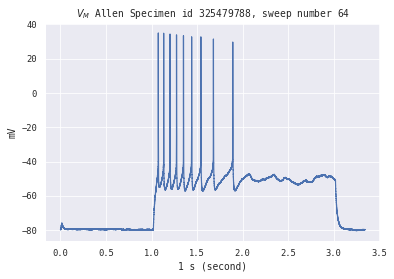

In [4]:

with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 2
* AdExp model 
* Allen specimen 325479788
You will notice that all the features are timinig related, and some would seem redudandant. This is because one must use brute force to get a good fit, for this particular problem.

Next can use sensativity analysis on the genes to find out which genes needed varying.

In [5]:
efel_filter_iterable = {
    "mean_frequency":None,
    "ISI_log_slope":None,
    "mean_frequency":None,
    "adaptation_index2":None,
    "first_isi":None,
    "ISI_CV":None,
    "median_isi":None,
    "Spikecount":None,
    "all_ISI_values":None,
    "ISI_values":None,
    "time_to_first_spike":None,
    "time_to_last_spike":None,
    "time_to_second_spike":None,
    "AHP1_depth_from_peak":None,
    "AHP2_depth_from_peak":None,
    "AHP_depth":None,
    "AHP_depth_abs":None,
    "AHP_depth_abs_slow":None,
    "AHP_depth_diff":None,
    "AHP_depth_from_peak":None,
    "AHP_slow_time":None,
    "AHP_time_from_peak":None}


def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    if model_type in str("IZHI"):
        fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                     model_type,
                                                     score_type=RelativeDifferenceScore,
                                                     efel_filter_iterable=efel_filter_iterable, MU =100,NGEN=200)
    else:
        fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                     model_type,
                                                     score_type=RelativeDifferenceScore,
                                                     efel_filter_iterable=efel_filter_iterable, MU =25,NGEN=40)
        
    return obs_preds,opt,target,hall_of_fame,cell_evaluator
( obs_preds,
    opt,
    target,
    hall_of_fame,
    cell_evaluator )  = test_opt_relative_diff(specimen_id = 325479788,
                                                                          model_type="ADEXP",
                                                                          efel_filter_iterable=efel_filter_iterable)


<class 'jithub.models.model_classes.ADEXPModel'>


  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]
2021-03-15 11:04:43.132 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


2  	10    	14300.1	13354.4	35.0867	28000
3  	5     	36.0638	1.70088	35.0867	39.7866
4  	5     	38.7272	1.66715	35.0867	39.7866
5  	4     	39.473 	5.08068	34.3679	46.7438
6  	4     	38.3002	4.88862	31.4011	45.9724
7  	4     	41.2995	6.01587	31.4011	45.9724
8  	4     	39.8116	7.89263	31.4011	51.141 
9  	4     	38.5219	6.82054	26.9666	43.9914
10 	4     	4690.78	10424.2	25.9778	28000  
11 	4     	26.6927	0.530552	25.9704	27.2276
12 	4     	26.2448	0.382868	25.9704	26.7862
13 	4     	27.1561	1.62613 	25.9148	30.6928
14 	4     	27.928 	2.19757 	25.9148	31.028 
15 	4     	26.7111	1.78068 	25.9148	30.6928
16 	4     	28.4729	2.51482 	24.3965	30.6928
17 	4     	28.7785	3.21082 	24.3965	32.3148
18 	4     	29.6987	2.93751 	24.3965	33.2247
19 	4     	29.7087	3.70762 	24.3965	33.3952
20 	4     	27.0921	2.89391 	24.3965	33.3952
21 	4     	31.4138	3.23563 	24.3965	33.7847
22 	5     	30.3041	2.8083  	24.3965	32.9183
23 	4     	28.6285	2.30246 	24.3965	31.5579
24 	4     	26.4523	2.29056 	24.3965	30.527 

INFO:__main__:Run stopped because of stopping criteria: Max ngen
2021-03-15 11:14:50.081 INFO    __main__: Run stopped because of stopping criteria: Max ngen


80 	4     	25.3229	3.00177 	23.2012	29.7151

[660.3795821476443, -30.666039302947986, -60.920930704722736, -78.41846316810995, 31.21877517971365, 17.170583541969204, 2.4467818438403057, 6.292840619083147, 321.07639425891404, -33.47136426203058, 62.12165911123304] the gene


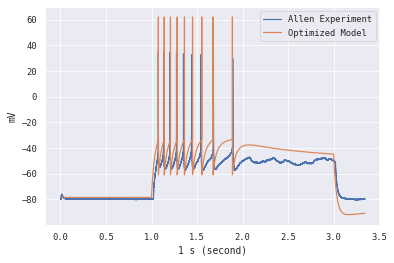

In [6]:

check_bin_vm_soma(target,opt)

In [7]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,660.38,-30.67,-60.92,-78.42,31.22,17.17,2.45,6.29,321.08,-33.47,62.12


In [8]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,mean_frequency,10.086294,10.129432,Relative Difference = 0.04
1,ISI_log_slope,0.485704,0.463778,Relative Difference = 0.02
2,adaptation_index2,0.091943,0.093395,Relative Difference = 0.00
3,ISI_CV,0.476055,0.470615,Relative Difference = 0.01
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,101.650000,Relative Difference = 0.56
6,ISI_values,108.400000,106.985714,Relative Difference = 1.41
7,time_to_first_spike,74.600000,75.300000,Relative Difference = 0.70
8,time_to_last_spike,892.300000,888.500000,Relative Difference = 3.80
9,time_to_second_spike,133.500000,139.600000,Relative Difference = 6.10


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

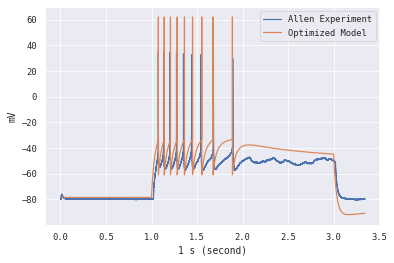

In [9]:
check_bin_vm_soma(target,opt)

In [10]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,660.38,-30.67,-60.92,-78.42,31.22,17.17,2.45,6.29,321.08,-33.47,62.12


## 